In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

## Logistic Regression Using Sklearn
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Exploratory Analysis

## Distribution of Wine Quality

Text(0, 0.5, '# of values')

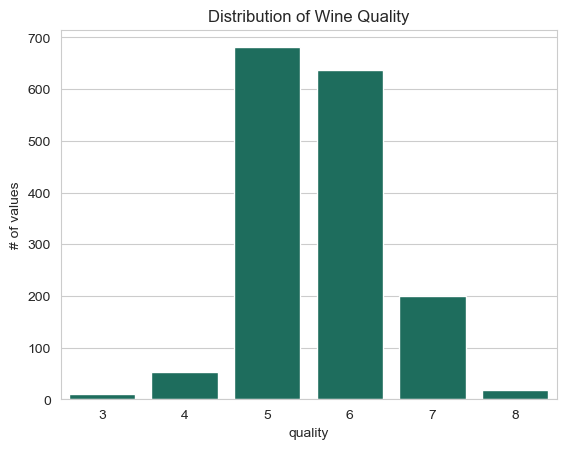

In [5]:
ax = sns.countplot(data = wine_df, x = "quality", color=dlsu_green)
ax.set_title("Distribution of Wine Quality")
ax.set_ylabel("# of values")

Text(0, 0.5, '# of values')

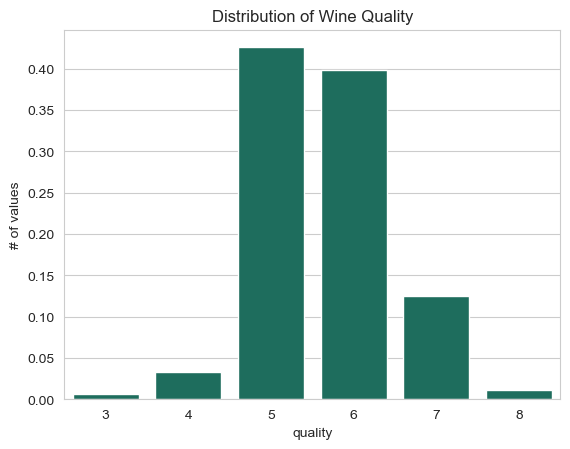

In [7]:
res = wine_df['quality'].value_counts(normalize=True)
ax = sns.barplot(x = res.index, y = res.values, color=dlsu_green)
ax.set_title("Distribution of Wine Quality")
ax.set_ylabel("# of values")

## Correlation Features

Text(0.5, 1.0, 'Correlation Heatmap for Wine Features')

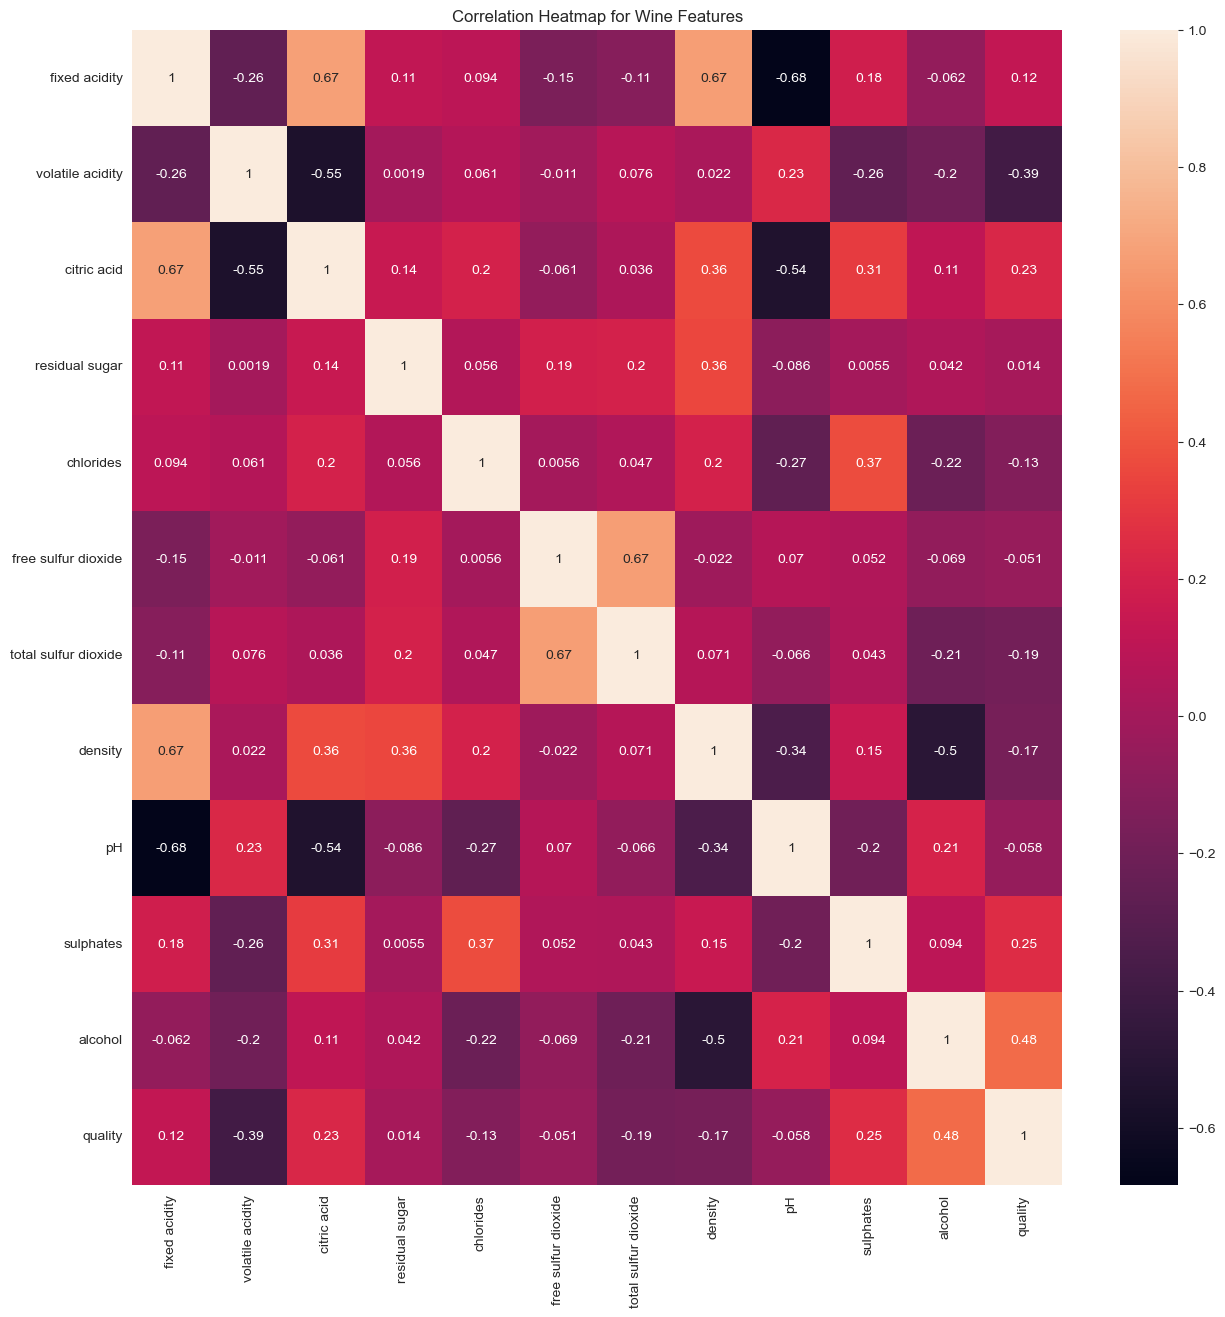

In [8]:
corr = wine_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, ax=ax)
ax.set_title("Correlation Heatmap for Wine Features")

## Reframe the problem: regression to classification problem

In [9]:
wine_df['quality_classif'] = wine_df.quality.apply(lambda x: 1 if x >= 7 else 0)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_classif
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


quality_classif
0    1382
1     217
Name: count, dtype: int64
quality_classif
0    0.86429
1    0.13571
Name: proportion, dtype: float64


<Axes: xlabel='quality_classif', ylabel='count'>

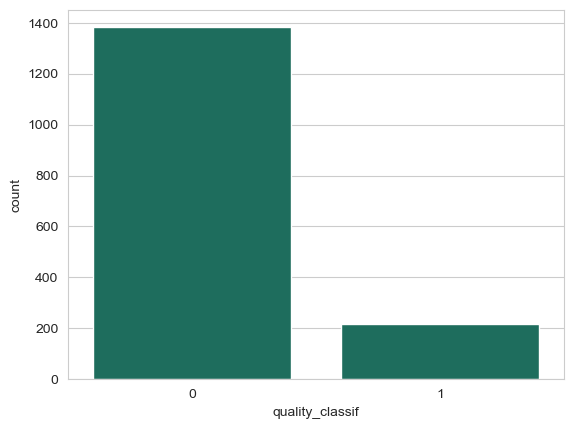

In [12]:
print(wine_df.quality_classif.value_counts())
print(wine_df.quality_classif.value_counts(normalize=True))
sns.countplot(x =wine_df.quality_classif, color=dlsu_green)

## Build a Model
### Train-Test Split Data

In [13]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_classif
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [14]:
X = wine_df.drop(labels=['quality', 'quality_classif'], axis=1)
y = wine_df['quality_classif']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train ",X_train.shape)

print("Test ",X_test.shape)


Train  (1279, 11)
Test  (320, 11)


## Create an Initial Model & Check for Precision, Recall, F1-Score


Logistic regression introduces regularization as part of the training process. The purpose of adding regularization is to prevent the model from overfitting and generalize better when used in unseen data. By applying regularization techniques some form of feature selection method is introduced since the coefficient values for the features are reduced. The 2 common regularization techniques introdued is Lasso (L1) and Ridge (L2) regression. The difference between the 2 is with Lasso regression coefficient values can become 0 while with Ridge coefficient values approach 0 but never 0. 

<img src="https://miro.medium.com/max/550/1*-LydhQEDyg-4yy5hGEj5wA.png">

An additional parameter besides the regularization technique to use if the C paramter. This parameter represents the regularization strength. With a high c value you are telling the model to trust the training data therefore whatever coefficient you are getting you would want to retain it. A low c value on the other hand means that you are telling the model that the data may not be representative of the real world therefore the coefficients should be reduced so that it can generalize better. 

Dive deep here:

https://www.youtube.com/watch?v=Xm2C_gTAl8c&ab_channel=StatQuestwithJoshStarmer <br>
https://hackernoon.com/practical-machine-learning-ridge-regression-vs-lasso-a00326371ece 


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Calculate Accuracy

In [17]:
print(f"Accruacy {clf.score(X_test, y_test)}")

Accruacy 0.865625


## Calculate Precision, Recall & F1-Score

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F1 Score = {f1_score(y_test, y_pred)}")

Precision = 0.625
Recall = 0.2127659574468085
F1 Score = 0.31746031746031744


## Plot the Feature Importance of the Model

In [1]:
cols = X_train.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=clf.coef_[0], y=cols)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - .2,
        p.get_y() + p.get_height() /2,
        '{:1.2f}'.format(width),
        ha='left',
        va = 'center',
        fontsize=13
    )

NameError: name 'X_train' is not defined

## Hyperparameter optimization

In [20]:
res = [] 

C = [0.01, 0.0001, 0.1, 1]
reg = ['l1', 'l2']

for c in C:
    for r in reg:
        if r == 'l2':
            clf = LogisticRegression(penalty=r, C=c, max_iter=500)
        elif r == 'l1':
            clf = LogisticRegression(penalty=r, C=c, solver='liblinear', max_iter=500)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        res.append([c, r, precision, recall, f1])

res_df = pd.DataFrame(data=res, columns=['C', 'reg', 'precison', 'recall', 'f1'])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
res_df

,C,reg,precison,recall,f1
0,0.0100,l1,0.000000,0.000000,0.000000
1,0.0100,l2,0.000000,0.000000,0.000000
2,0.0001,l1,0.000000,0.000000,0.000000
3,0.0001,l2,0.000000,0.000000,0.000000
4,0.1000,l1,0.500000,0.106383,0.175439
5,0.1000,l2,0.562500,0.191489,0.285714
6,1.0000,l1,0.631579,0.255319,0.363636
7,1.0000,l2,0.571429,0.255319,0.352941


Precision = 0.6666666666666666
Recall = 0.2553191489361702
F1 Score = 0.36923076923076914


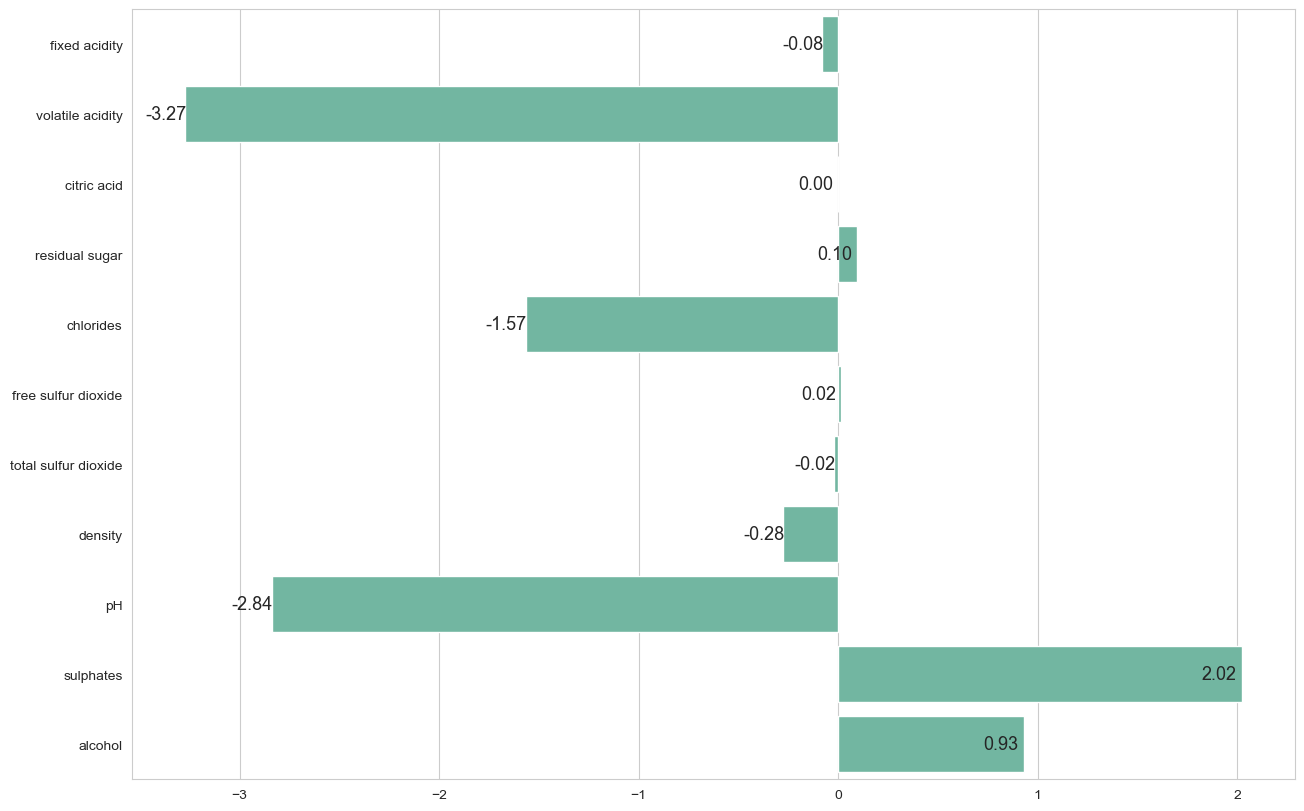

In [22]:
clf = LogisticRegression(penalty='l1', C=0.9, solver='liblinear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F1 Score = {f1_score(y_test, y_pred)}")

cols = X_train.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=clf.coef_[0], y=cols)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - .2,
        p.get_y() + p.get_height() /2,
        '{:1.2f}'.format(width),
        ha='left',
        va = 'center',
        fontsize=13
    )

Precision = 0.0
Recall = 0.0
F1 Score = 0.0


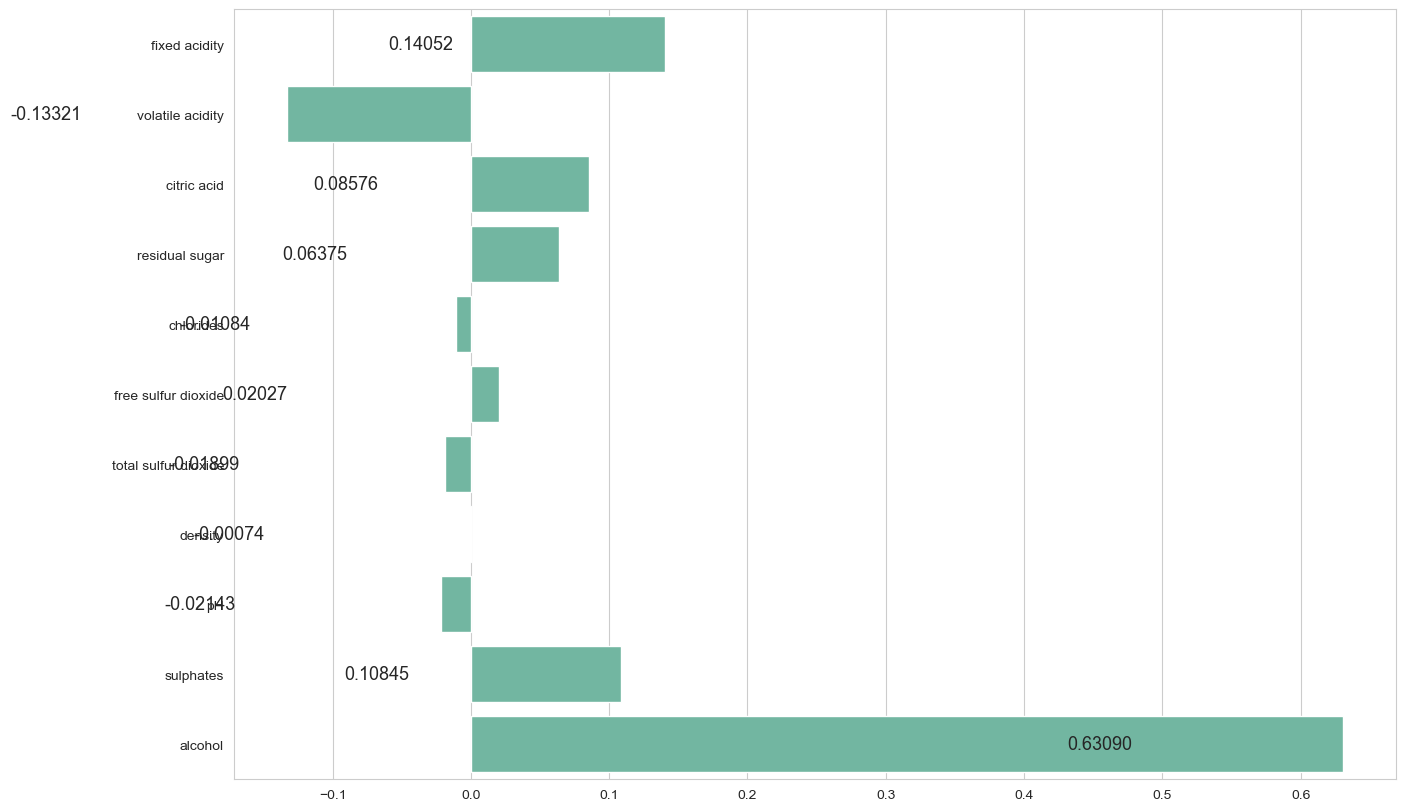

In [23]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F1 Score = {f1_score(y_test, y_pred)}")

cols = X_train.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=clf.coef_[0], y=cols)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - .2,
        p.get_y() + p.get_height() /2,
        '{:1.5f}'.format(width),
        ha='left',
        va = 'center',
        fontsize=13
    )

## Use K-Means Classifier and Calculate Precision, Recall & F1-Score

In [24]:
from sklearn.neighbors import KNeighborsClassifier

res = []
for k in range(1,15):
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    
    test_score = clf.score(X_test, y_test) 
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    res.append([k, test_score, precision, recall, f1])
res_df = pd.DataFrame(res, columns=["k", "test_score", "precision", "recall", "f1"])
res_df

,k,test_score,precision,recall,f1
0,1,0.853125,0.500000,0.468085,0.483516
1,2,0.850000,0.478261,0.234043,0.314286
2,3,0.850000,0.484848,0.340426,0.400000
3,4,0.859375,0.600000,0.127660,0.210526
4,5,0.856250,0.526316,0.212766,0.303030
5,6,0.850000,0.428571,0.063830,0.111111
6,7,0.840625,0.357143,0.106383,0.163934
7,8,0.846875,0.333333,0.042553,0.075472
8,9,0.837500,0.272727,0.063830,0.103448
9,10,0.840625,0.166667,0.021277,0.037736
